###import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###loading data

In [ ]:
data = pd.read_csv("/content/SCADI.csv")
data.head()

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6


##Preprocesing

###Check for NULL data

In [ ]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Series([], dtype: int64)

In [ ]:
data.shape

(70, 206)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 206 entries, Gender to Classes
dtypes: int64(205), object(1)
memory usage: 112.8+ KB


###droping Classes

In [ ]:
data_y = data["Classes"]
data = data.drop("Classes", axis = 1)

In [ ]:
data.shape

(70, 205)

###Elbow method for checking how many cluster we need

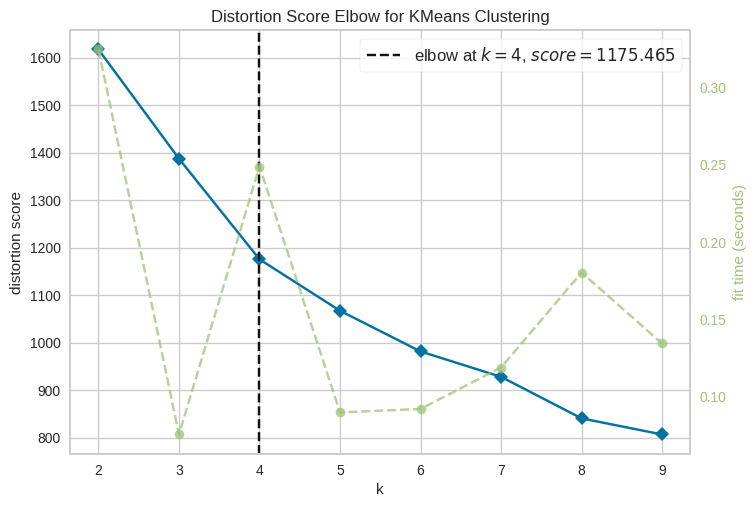

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k =(2,10))
visualizer.fit(data)
visualizer.show()
plt.show()



###calinski_harabasz method checking how many cluster we need

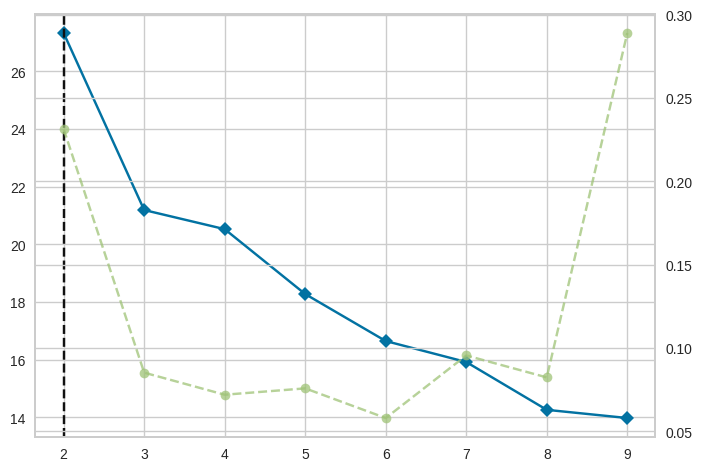

In [ ]:
visualizer2 = KElbowVisualizer(model ,k=(2,10), metric='calinski_harabasz', timings = True,locate_elbow = True)
visualizer2.fit(data)
visualizer.show()
plt.show()

###Since we know we have 7 classes we going with elbow result and using 4 clusters

###fitting the model

In [ ]:
kmeans = KMeans(n_clusters = 4,random_state = 24, max_iter = 1000)
y_means = kmeans.fit_predict(data)

###visualising intercluster distance

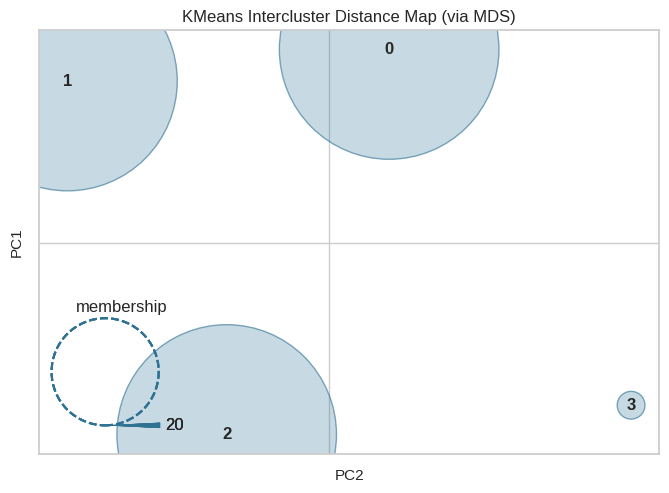

In [ ]:
from yellowbrick.cluster import InterclusterDistance
visualizer4 = InterclusterDistance(kmeans)
visualizer4.fit(data)
visualizer4.show()
plt.show()

###centroid of clusters

In [ ]:
centroid = kmeans.cluster_centers_
centroid

##visualizing the clusters in 2D with pca

In [ ]:
y_means = pd.DataFrame(index = y_means)
y_means = y_means.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
y_means.reset_index(level = 0,inplace = True)
y_means = y_means.rename(columns = {'index':'Labels'})
y_means.head(5)

,Labels
0,Cluster 4
1,Cluster 4
2,Cluster 4
3,Cluster 4
4,Cluster 4


###dimension reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(data)

###visualing the results

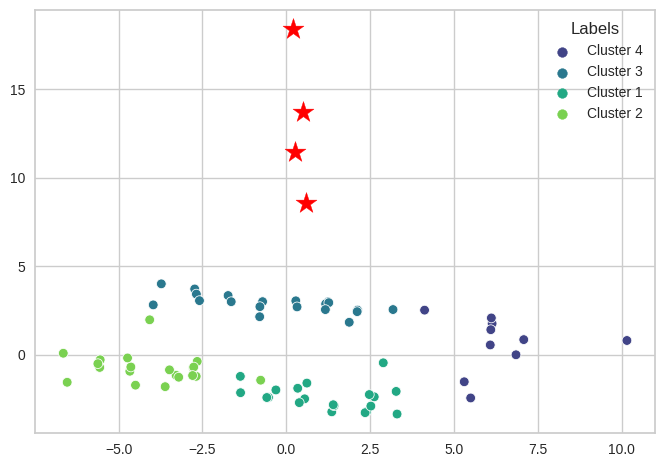

In [ ]:
sns.scatterplot(data,x = X[:,0],y = X[:,1],hue = y_means['Labels'],palette = 'viridis')
plt.scatter(x = centroid[:,0],y =centroid[:,1],c='red',s = 250,marker='*')
plt.show()



###since we have 7 classe we check 7 clusters too

In [ ]:
kmeans7 = KMeans(n_clusters = 7,random_state = 24, max_iter = 1000)
y_means7 = kmeans7.fit_predict(data)

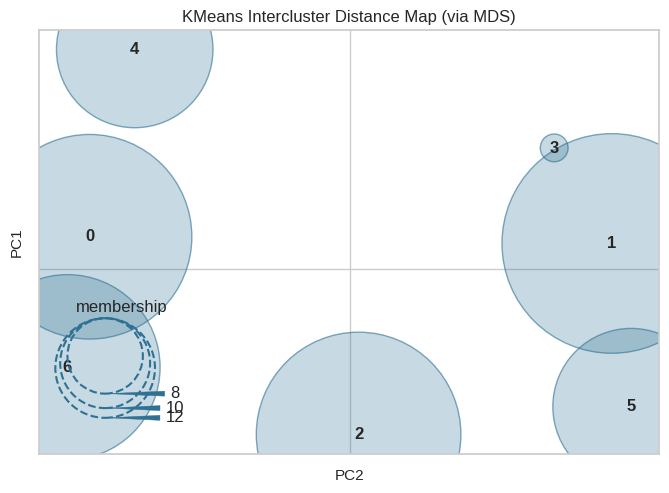

In [ ]:
visualizer7 = InterclusterDistance(kmeans7)
visualizer7.fit(data)
visualizer7.show()
plt.show()

In [ ]:
centroid7 = kmeans7.cluster_centers_

In [ ]:
y_means7 = pd.DataFrame(index = y_means7)
y_means7 = y_means7.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5', 5:'Cluster 6',6:'Cluster 7'})
y_means7.reset_index(level = 0,inplace = True)
y_means7 = y_means7.rename(columns = {'index':'Labels'})
y_means7.head(5)

,Labels
0,Cluster 5
1,Cluster 5
2,Cluster 5
3,Cluster 5
4,Cluster 5


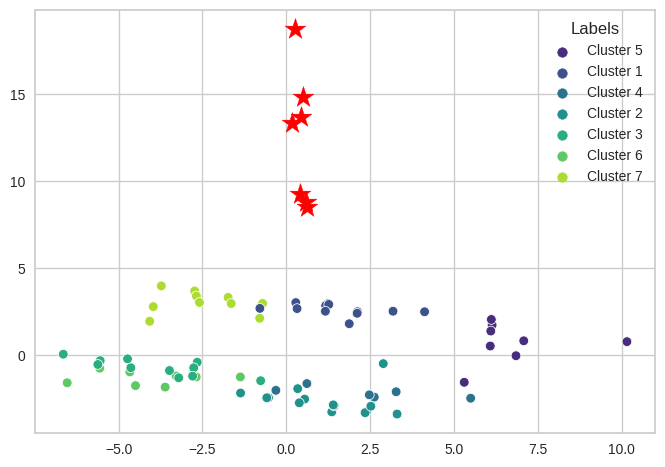

In [ ]:
sns.scatterplot(data,x = X[:,0],y = X[:,1],hue = y_means7['Labels'],palette = 'viridis')
plt.scatter(x = centroid7[:,0],y =centroid7[:,1],c='red',s = 250,marker='*')
plt.show()

##using PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
pca.fit(data)



PCA(random_state=42, svd_solver='randomized')

###checking for the best number of component with variance ratio

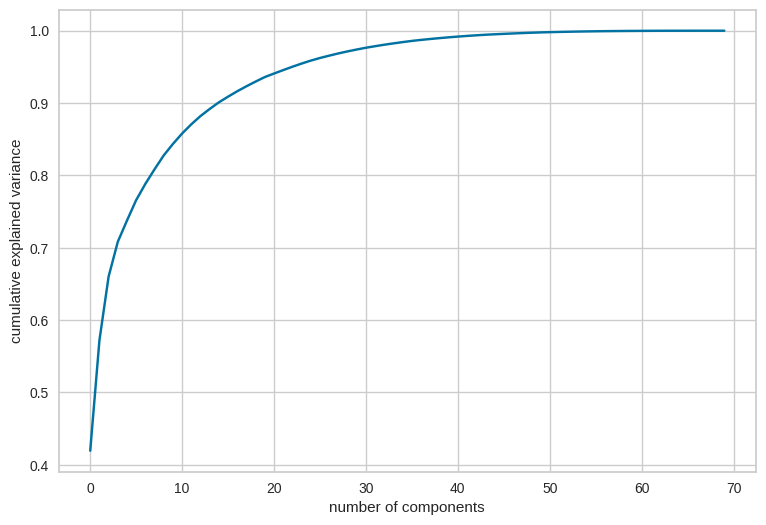

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (9,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###We used 20 number of them

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
pca_data = pca_final.fit_transform(data)
pca_data.shape

(70, 20)

###fitting the model for PCA

In [ ]:
kmeans_pca = KMeans(n_clusters = 4,random_state = 24, max_iter = 1000)
y_means_pca = kmeans_pca.fit_predict(pca_data)

###visualising intercluster distance

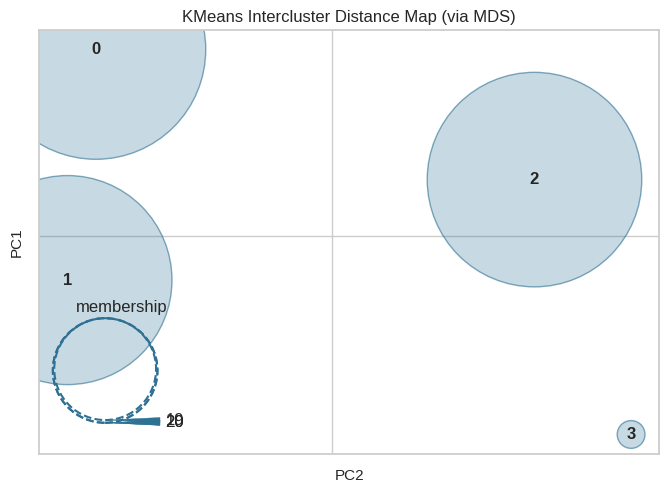

In [ ]:
visualizer_pca = InterclusterDistance(kmeans_pca)
visualizer_pca.fit(pca_data)
visualizer_pca.show()
plt.show()

###visualizing the clusters in 2D with pca

In [ ]:
y_means_pca = pd.DataFrame(index = y_means_pca)
y_means_pca = y_means_pca.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
y_means_pca.reset_index(level = 0,inplace = True)
y_means_pca = y_means_pca.rename(columns = {'index':'Labels'})
y_means_pca.head(5)

,Labels
0,Cluster 4
1,Cluster 4
2,Cluster 4
3,Cluster 4
4,Cluster 4


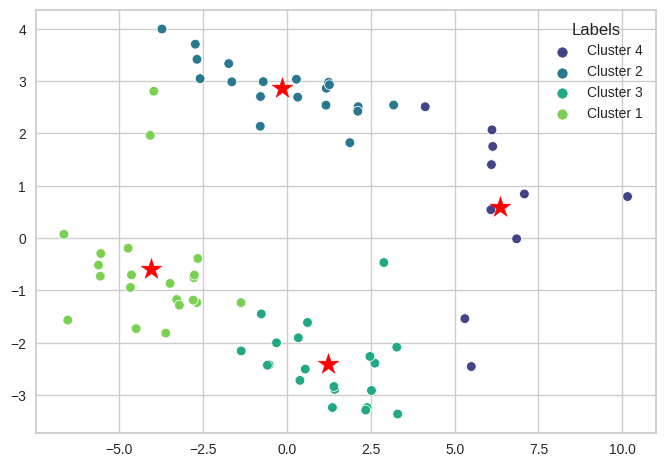

In [ ]:
centroid_pca = kmeans_pca.cluster_centers_
sns.scatterplot(data,x = X[:,0],y = X[:,1],hue = y_means_pca['Labels'],palette = 'viridis')
plt.scatter(x = centroid_pca[:,0],y =centroid_pca[:,1],c='red',s = 250,marker='*')
plt.show()


##using svd clustering

In [ ]:
# perform SVD on the matrix
U, S, Vt = np.linalg.svd(data)
# select the top k singular values
k = 20
S_k = np.diag(S[:k])

# select the top k left singular vectors
U_k = U[:, :k]

# perform clustering on the reduced matrix
kmeans_svd = KMeans(n_clusters=4, random_state= 24)
y_means_svd = kmeans_svd.fit_predict(U_k @ S_k)

# print the resulting labels
print(kmeans_svd.labels_)

[3 3 3 3 3 3 1 3 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 2
 2 1 1 2 2 2 0 2 2 2 2 1 2 2 2 1 1 3 2 2 3 3 1 1 2 2 2 2 2 0 0 0 1]


In [ ]:
kmeans_svd.labels_.shape

(70,)

###visualising interclusers

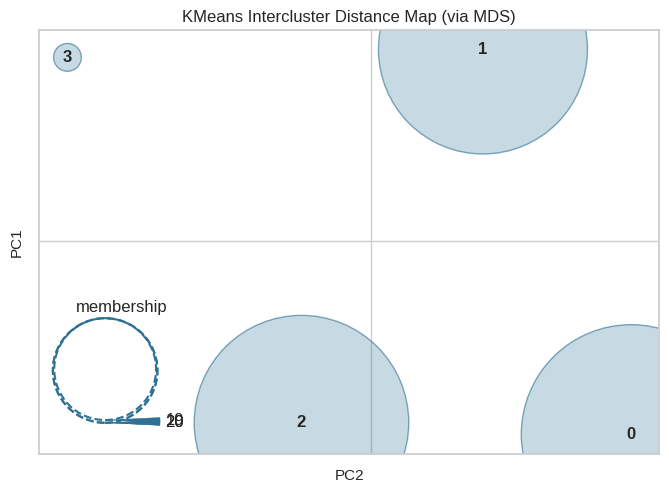

In [ ]:
visualizer_svd = InterclusterDistance(kmeans_svd)
visualizer_svd.fit(data)
visualizer_svd.show()
plt.show()

###visualising results

In [ ]:
y_means_svd = pd.DataFrame(index = y_means_svd)
y_means_svd = y_means_svd.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
y_means_svd.reset_index(level = 0,inplace = True)
y_means_svd = y_means_svd.rename(columns = {'index':'Labels'})
y_means_svd.head(5)

,Labels
0,Cluster 4
1,Cluster 4
2,Cluster 4
3,Cluster 4
4,Cluster 4


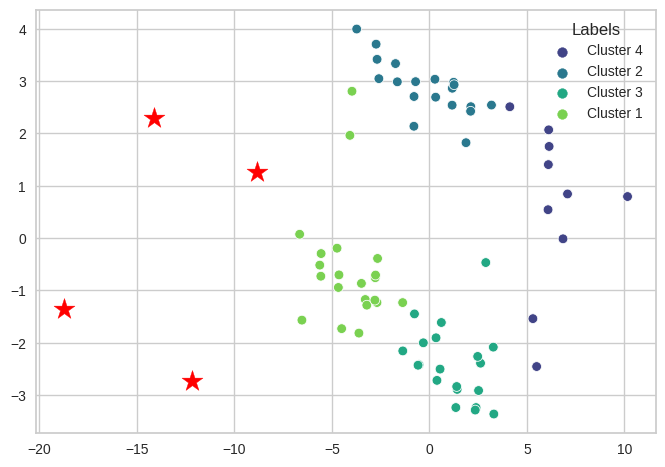

In [ ]:
centroid_svd = kmeans_svd.cluster_centers_
sns.scatterplot(data,x = X[:,0],y = X[:,1],hue = y_means_svd['Labels'],palette = 'viridis')
plt.scatter(x = centroid_svd[:,0],y =centroid_svd[:,1],c='red',s = 250,marker='*')
plt.show()
